### Define candidate MHW grid points using a percentile based threshold

In [1]:
import xarray as xr


#### Import preprocessed data

In [2]:
ds_new = xr.open_dataset('~/marine-heatwaves/data/preprocessed_oisst.nc')
ssta_notrend = ds_new.ssta_notrend

#### Calculate 90th percentile threshold from the origonal detrended SST anomalies

In [7]:
# Define extreme threshold as the 90th percentile
thresh = .9

# Rechunk time dim
if ssta_notrend.chunks:
    ssta_notrend = ssta_notrend.chunk({'time': -1})

# Compute values of the monthly threshold
prct_90 = ssta_notrend.quantile(thresh, dim='time', keep_attrs=True, skipna=True)


#### Find where SSTa exceeds the 90th percentile threshold

In [6]:
# Take only the SSTa that exceeds the calculated monthly threshold
mhw_ssta = ssta_notrend.where(ssta_notrend>prct_90)


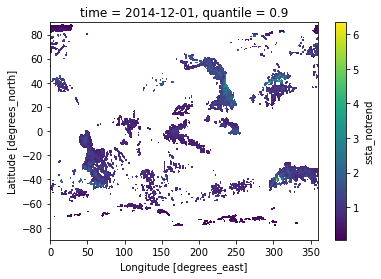

In [11]:
mhw_ssta.sel(time='2014-12-01').plot()

### Save extreme values as new output 

In [9]:
# xarray Dataset to save
ds_out = xr.Dataset(
    data_vars=dict(
        mhw_ssta=(['time', 'lat', 'lon'], mhw_ssta.values),
        prct_90=(['lat', 'lon'], prct_90.values),

    ),
    coords=dict(
        lon=ds_new.lon,
        lat=ds_new.lat,
        time=ds_new.time,
    ),
    attrs=dict(description="OISST v2.1 preprocessed for Ocetrac",
              threshold='90th percentile',
              climatology='entire period'),
)
ds_out

<xarray.Dataset>
Dimensions:   (time: 478, lat: 720, lon: 1440)
Coordinates:
  * lon       (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * lat       (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * time      (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2021-06-01
Data variables:
    mhw_ssta  (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
    prct_90   (lat, lon) float64 nan nan nan nan ... 0.1898 0.1328 0.1348 0.1348
Attributes:
    description:  OISST v2.1 preprocessed for Ocetrac
    threshold:    90th percentile
    climatology:  entire period

In [10]:
ds_out.to_netcdf('~/marine-heatwaves/data/mhw_candidates.nc')